In [82]:
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_df = pd.read_csv("train/train.En.csv")[["tweet", "sarcastic", "rephrase"]]
train_df["tweet"] = train_df["tweet"].fillna("")
train_df["rephrase"] = train_df["rephrase"].fillna("")

test_df = pd.read_csv("test/task_A_En_test.csv")
test_df["text"] = test_df["text"].fillna("")


In [14]:
train_df

,tweet,sarcastic,rephrase
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring..."
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall..."
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to..."
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...
...,...,...,...
3463,The population spike in Chicago in 9 months is...,0,
3464,You'd think in the second to last English clas...,0,
3465,I’m finally surfacing after a holiday to Scotl...,0,
3466,Couldn't be prouder today. Well done to every ...,0,


In [7]:
test_df

,text,sarcastic
0,"Size on the the Toulouse team, That pack is mo...",0
1,Pinball!,0
2,So the Scottish Government want people to get ...,1
3,villainous pro tip : change the device name on...,0
4,I would date any of these men 🥺,0
...,...,...
1395,I’ve just seen this and felt it deserved a Ret...,0
1396,Omg how an earth is that a pen !!! 🤡,0
1397,Bringing Kanye and drake to a tl near you,0
1398,"I love it when women are referred to as ""girl ...",1


In [23]:
train_df.groupby(by = "sarcastic", as_index = False)["sarcastic"].count()

,sarcastic
0,2601
1,867


In [79]:
867 / 3468

0.25

In [21]:
test_df.groupby(by = "sarcastic", as_index = False)["sarcastic"].count()

,sarcastic
0,1200
1,200


In [80]:
200 / 1400

0.14285714285714285

In [208]:
train_df["n_letters"] = [len(train_df["tweet"][i]) for i in range(len(train_df))]
test_df["n_letters"] = [len(test_df["text"][i]) for i in range(len(test_df))]

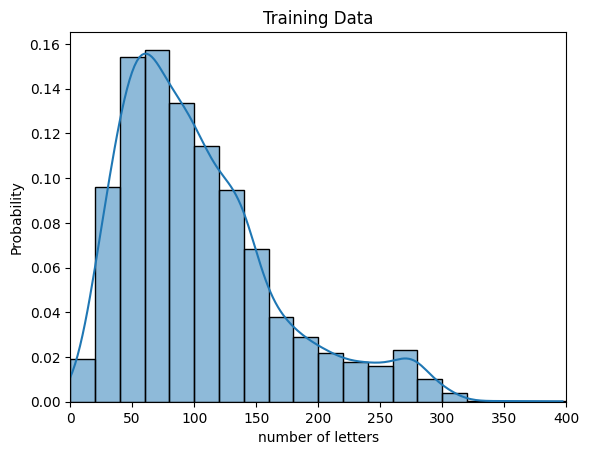

In [209]:
sns.histplot(
    data=train_df, 
    x="n_letters", 
    stat="probability", 
    binwidth=20, 
    kde=True,
)
plt.xlim(0, 400)
plt.xlabel("number of letters")
plt.title("Training Data")
plt.show()

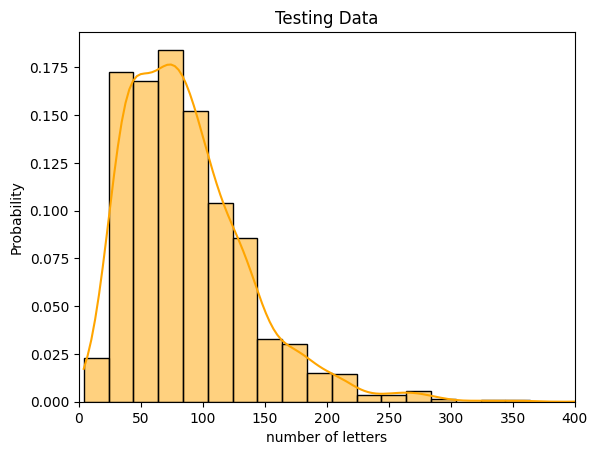

In [210]:
sns.histplot(
    data=test_df, 
    x="n_letters", 
    stat="probability",  
    binwidth=20, 
    kde=True,
    color="orange"
)
plt.xlim(0, 400)
plt.xlabel("number of letters")
plt.title("Testing Data")
plt.show()

In [215]:
train_df["n_words"] = [len(train_df["tweet"][i].split()) for i in range(len(train_df))]
test_df["n_words"] = [len(test_df["text"][i].split()) for i in range(len(test_df))]

In [223]:
train_df["n_words"].describe()

count    3468.000000
mean       18.827855
std        11.279779
min         0.000000
25%        10.000000
50%        16.500000
75%        25.000000
max        61.000000
Name: n_words, dtype: float64

In [224]:
test_df["n_words"].describe()

count    1400.000000
mean       16.400000
std         9.804012
min         1.000000
25%         9.000000
50%        15.000000
75%        20.250000
max       128.000000
Name: n_words, dtype: float64

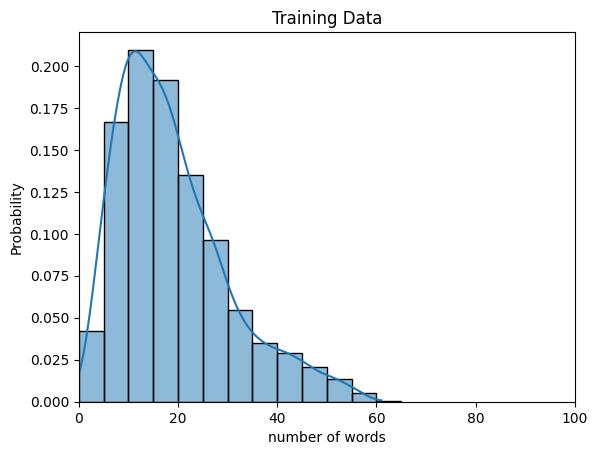

In [222]:
sns.histplot(
    data=train_df, 
    x="n_words", 
    stat="probability", 
    binwidth=5, 
    kde=True,
)
plt.xlim(0, 100)
plt.xlabel("number of words")
plt.title("Training Data")
plt.show()

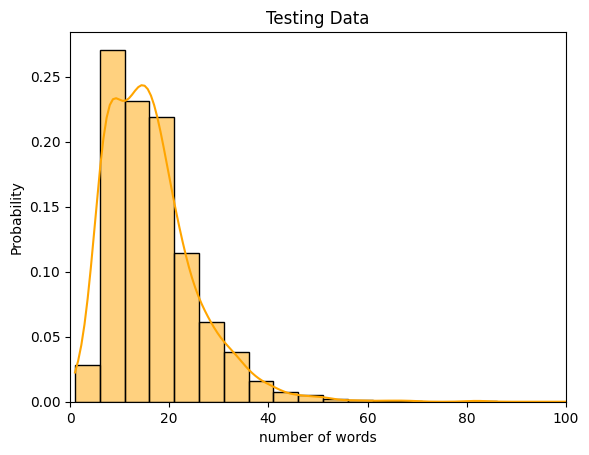

In [221]:
sns.histplot(
    data=test_df, 
    x="n_words", 
    stat="probability",  
    binwidth=5, 
    kde=True,
    color="orange"
)
plt.xlim(0, 100)
plt.xlabel("number of words")
plt.title("Testing Data")
plt.show()

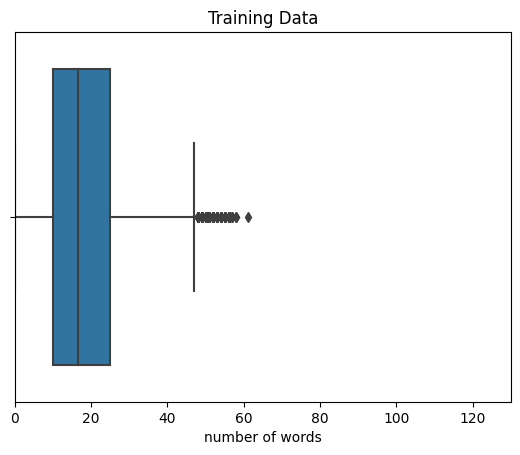

In [229]:
sns.boxplot(
    data=train_df, 
    x="n_words", 
)
plt.xlim(0, 130)
plt.xlabel("number of words")
plt.title("Training Data")
plt.show()

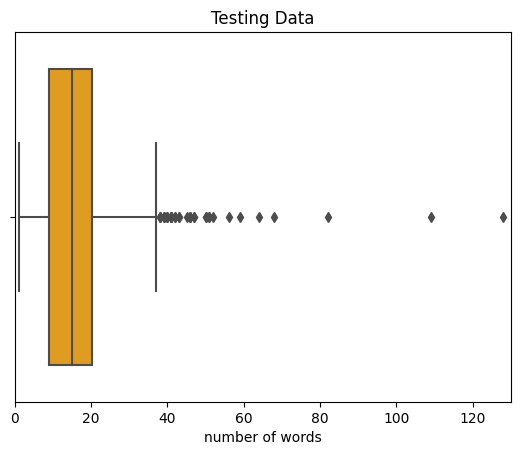

In [230]:
sns.boxplot(
    data=test_df, 
    x="n_words",
    color="orange"
)
plt.xlim(0, 130)
plt.xlabel("number of words")
plt.title("Testing Data")
plt.show()